In [2]:
# Core
import pandas as pd, numpy as np
from pathlib import Path

# Viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Widgets (optional)
import ipywidgets as wdg
from IPython.display import display, Markdown

In [49]:
filenames = {
    "df_merged": "df_merged.csv",
    "abatement_costs": "abatement_costs.csv",
    "abatement_detail": "abatement_detail.csv",
    "abatement_summary": "abatement_summary.csv",
    "annual_abatement_costs": "annual_abatement_costs.csv",
    "carbon_costs": "carbon_costs.csv",
    "carbon_prices_full": "carbon_prices_full.csv",
    "df_abatement": "df_abatement.csv",
    "df_carbon_prices": "df_carbon_prices.csv",
    "df_emissions": "df_emissions.csv",
    "df_merged": "df_merged.csv",
    "df_targets_clean": "df_targets_clean.csv",
    "emissions_paths": "emissions_paths.csv",
    # "emissions_targets": "emissions_targets.csv",
    "ngfs_global_snapshot": "ngfs_global_snapshot_1750868451.csv",
    "ngfs_snapshot": "ngfs_snapshot_1750868525.csv",
    "projected_carbon_prices": "projected_carbon_prices.csv",
    "tradeoff_analysis": "tradeoff_analysis.csv",
    # "tradeoff_table": "tradeoff_table.csv",
}

dfs = {name: pd.read_csv(path) for name, path in filenames.items()}


In [50]:
# Display head of each dataframe in the dfs dictionary
for name in filenames:
    if name in dfs:
        print(f"\n{name}.head():")
        display(dfs[name].head())
    else:
        print(f"\n{name} not found in dfs")



df_merged.head():


,uid,type_of_target,reduction_target,reduction_value,reduction_type,reduction_unit,baseline_year,endline_year,comment,gics_sector,country,year,scope1_tonnes,scope2_tonnes,unit_production,production_volume,merge_status
0,C001,Scope 2,0.547,0.547,absolute,%,2019,2050,NaN,Real Estate,Global,2025.0,21510000.0,1070000.0,m2 building,46280000.0,both
1,C002,Scope 1,0.35 tCO2e/MWh,0.350,intensity,tCO2e/mwh,2020,2050,NaN,Energy,Brazil,2025.0,6570000.0,17510000.0,MWh,40950000.0,both
2,C003,Scope 1,0.348,0.348,absolute,%,2018,2050,NaN,Energy,EU,2025.0,19940000.0,7720000.0,MWh,69790000.0,both
3,C003,Scope 2,0.256,0.256,absolute,%,2019,2050,NaN,Energy,EU,2025.0,19940000.0,7720000.0,MWh,69790000.0,both
4,C004,Scope 2,0.188,0.188,absolute,%,2024,2050,NaN,Consumer Discretionary,Unknown,2025.0,13340000.0,17140000.0,unit,98870000.0,both



abatement_costs.head():


,uid,target_type,annual_reduction_tonnes,abatement_cost_usd_year,technology
0,C003,Scope 1,234715,7879389,Wind Power
1,C003,Scope 2,67076,2251733,Wind Power
2,C003,Scope 1,234715,7879389,Wind Power
3,C003,Scope 2,67076,2251733,Wind Power
4,C004,Scope 2,124838,4385561,Heat Pumps



abatement_detail.head():


,uid,year,technology,new_build,tonnes,capex_usd,opex_usd_year,spare_after_yr
0,C001,2026,Wind Power,True,23412.0,631170000.0,785940.84,66775.0
1,C001,2027,Wind Power,False,23411.0,0.0,785907.27,43364.0
2,C001,2028,Wind Power,False,23412.0,0.0,785940.84,19952.0
3,C001,2029,Wind Power,False,19952.0,0.0,669788.64,86728.0
4,C001,2029,Wind Power,True,3459.0,631170000.0,116118.63,86728.0



abatement_summary.head():


,uid,total_capex_usd,total_opex_usd,total_abated_tonnes
0,C001,4.418190e+09,1.964819e+07,585290.0
1,C002,8.205210e+09,3.670457e+07,1093374.0
2,C003,2.249050e+10,1.920049e+08,6939120.0
3,C004,4.827500e+09,4.218650e+07,3222320.0
4,C005,5.975138e+10,1.110492e+09,0.0



annual_abatement_costs.head():


,uid,year,abatement_tonnes,capex_usd,opex_usd_year,cum_capex_usd,cum_opex_usd
0,C001,2025,0.0,0.0,0.00,0.000000e+00,0.00
1,C001,2026,23412.0,631170000.0,785940.84,6.311700e+08,785940.84
2,C001,2027,23411.0,0.0,785907.27,6.311700e+08,1571848.11
3,C001,2028,23412.0,0.0,785940.84,6.311700e+08,2357788.95
4,C001,2029,23411.0,631170000.0,785907.27,1.262340e+09,3143696.22



carbon_costs.head():


,uid,year,scenario,carbon_cost_usd
0,C002,2025,Low Risk,7.288256e+08
1,C002,2025,Medium Risk,7.818776e+08
2,C002,2025,High Risk,7.851601e+08
3,C002,2026,Low Risk,7.525294e+08
4,C002,2026,Medium Risk,8.330080e+08



carbon_prices_full.head():


,year,carbon_price_usd_tco2e,sector,region,scenario,source
0,2025,9.200000,Consumer Discretionary,China,High Risk,adaptive_cagr
1,2026,11.247222,Consumer Discretionary,China,High Risk,adaptive_cagr
2,2027,13.750000,Consumer Discretionary,China,High Risk,adaptive_cagr
3,2028,15.179555,Consumer Discretionary,China,High Risk,adaptive_cagr
4,2029,16.757738,Consumer Discretionary,China,High Risk,adaptive_cagr



df_abatement.head():


,sector,region,technology,initial_investment_usd_million,abatement_capacity_tco2e_year,abatement_cost_usd_tco2e_year
0,Energy,USA,Utility-scale Solar,350.52,60952,50.97
1,Energy,USA,Wind Power,218.94,192720,31.15
2,Energy,EU,Utility-scale Solar,558.64,54776,44.22
3,Energy,EU,Carbon Capture and Storage,340.98,50000,105.16
4,Energy,China,Utility-scale Solar,380.28,217543,43.47



df_carbon_prices.head():


,sector,region,year,scenario,carbon_price_usd_tco2e
0,Energy,USA,2025,Low Risk,58.07
1,Energy,USA,2027,Low Risk,57.92
2,Energy,USA,2030,Low Risk,59.77
3,Energy,USA,2025,Medium Risk,55.26
4,Energy,USA,2027,Medium Risk,65.63



df_emissions.head():


,uid,gics_sector,country,year,scope1_tonnes,scope2_tonnes,unit_production,production_volume
0,C001,Real Estate,Global,2025,21510000.0,1070000.0,m2 building,46280000.0
1,C002,Energy,Brazil,2025,6570000.0,17510000.0,MWh,40950000.0
2,C003,Energy,EU,2025,19940000.0,7720000.0,MWh,69790000.0
3,C004,Consumer Discretionary,Unknown,2025,13340000.0,17140000.0,unit,98870000.0
4,C005,Financials,EU,2025,7470000.0,10710000.0,unit,68920000.0



df_targets_clean.head():


,uid,type_of_target,reduction_target,reduction_value,reduction_type,reduction_unit,baseline_year,endline_year,comment
0,C001,Scope 2,0.547,0.547,absolute,%,2019,2050,NaN
1,C002,Scope 1,0.35 tCO2e/MWh,0.350,intensity,tCO2e/mwh,2020,2050,NaN
2,C003,Scope 1,0.348,0.348,absolute,%,2018,2050,NaN
3,C003,Scope 2,0.256,0.256,absolute,%,2019,2050,NaN
4,C004,Scope 2,0.188,0.188,absolute,%,2024,2050,NaN



emissions_paths.head():


,uid,gics_sector,country,type_of_target,year,scope1_tonnes,scope2_tonnes,scenario,growth_rate,interpolation_method
0,C001,Real Estate,Global,Scope 2,2025,21510000,1070000,low,0.0,linear
1,C001,Real Estate,Global,Scope 2,2026,21510000,1046588,low,0.0,linear
2,C001,Real Estate,Global,Scope 2,2027,21510000,1023177,low,0.0,linear
3,C001,Real Estate,Global,Scope 2,2028,21510000,999765,low,0.0,linear
4,C001,Real Estate,Global,Scope 2,2029,21510000,976354,low,0.0,linear



ngfs_global_snapshot.head():


,Model,Scenario,Region,Variable,Unit,2020,2025,2030,2035,2040,2045,2050,2055,2060,2070,2080,2090,2100
0,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Below 2?C,World,Price|Carbon,US$2010/t CO2,0.0,0.0,49.932541,54.812040,66.416543,88.090790,111.985720,128.574041,155.968481,251.739652,387.443060,279.666512,260.054474
1,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Current Policies,World,Price|Carbon,US$2010/t CO2,0.0,0.0,2.375986,2.736761,3.114615,3.518626,3.929533,4.335628,4.731550,5.521350,6.235536,6.898318,7.552773
2,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Delayed transition,World,Price|Carbon,US$2010/t CO2,0.0,0.0,2.375986,50.876467,75.862313,85.518030,110.633704,137.419815,164.296311,248.082436,387.531726,296.537709,252.706153
3,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Fragmented World,World,Price|Carbon,US$2010/t CO2,0.0,0.0,2.375986,13.829744,14.472360,19.222453,63.986743,41.070881,138.360254,81.700710,166.250012,74.643204,84.064246
4,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Low demand,World,Price|Carbon,US$2010/t CO2,0.0,0.0,98.249605,127.377459,170.076352,198.587790,243.030407,287.877443,371.403401,386.485124,423.070052,129.495958,140.417237



ngfs_snapshot.head():


,Model,Scenario,Region,Variable,Unit,2020,2025,2030,2035,2040,2045,2050,2055,2060,2070,2080,2090,2100
0,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Below 2?C,OECD & EU (R5),Price|Carbon,US$2010/t CO2,0.0,0.0,48.151919,54.664413,66.323205,89.748734,114.415061,128.479413,176.171349,252.988259,377.229880,281.702501,257.131503
1,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Current Policies,OECD & EU (R5),Price|Carbon,US$2010/t CO2,0.0,0.0,0.074391,0.604857,1.137905,1.671860,2.207314,2.741388,3.276003,4.347433,5.415807,6.483165,7.552773
2,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Delayed transition,OECD & EU (R5),Price|Carbon,US$2010/t CO2,0.0,0.0,0.074391,52.779089,76.964237,83.161340,124.884168,138.353271,192.158764,248.216599,372.872342,297.751302,251.044748
3,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Fragmented World,OECD & EU (R5),Price|Carbon,US$2010/t CO2,0.0,0.0,0.074391,5.037281,5.492512,6.854256,87.010049,27.280828,240.332619,97.098778,166.497631,95.210189,100.899541
4,MESSAGEix-GLOBIOM 2.0-M-R12-NGFS,Low demand,OECD & EU (R5),Price|Carbon,US$2010/t CO2,0.0,0.0,99.775780,124.441146,173.273086,195.593972,239.026697,296.544334,383.275610,417.299853,552.739086,180.974456,187.380194



projected_carbon_prices.head():


,sector,region,scenario,level_3,year,carbon_price_usd_tco2e
0,Consumer Discretionary,China,High Risk,0,2025,9.527632
1,Consumer Discretionary,China,High Risk,1,2026,11.365789
2,Consumer Discretionary,China,High Risk,2,2027,13.203947
3,Consumer Discretionary,China,High Risk,3,2028,15.042105
4,Consumer Discretionary,China,High Risk,4,2029,16.880263



tradeoff_analysis.head():


,uid,year,scenario,carbon_cost_without_usd,total_cost_with_abatement_usd,net_savings_usd
0,C002,2025,Low Risk,729137884,729137884,0
1,C002,2025,High Risk,802687092,802687092,0
2,C002,2026,Low Risk,754167386,751286642,2880744
3,C002,2026,High Risk,919940372,916426414,3513958
4,C002,2027,Low Risk,780056088,774096823,5959266


In [ ]:
dfs["df_merged"].head()

Why the transition matters

Metric Cumulative system-wide emissions vs. Paris-aligned budget
Visual Stacked-area “emissions wedge”

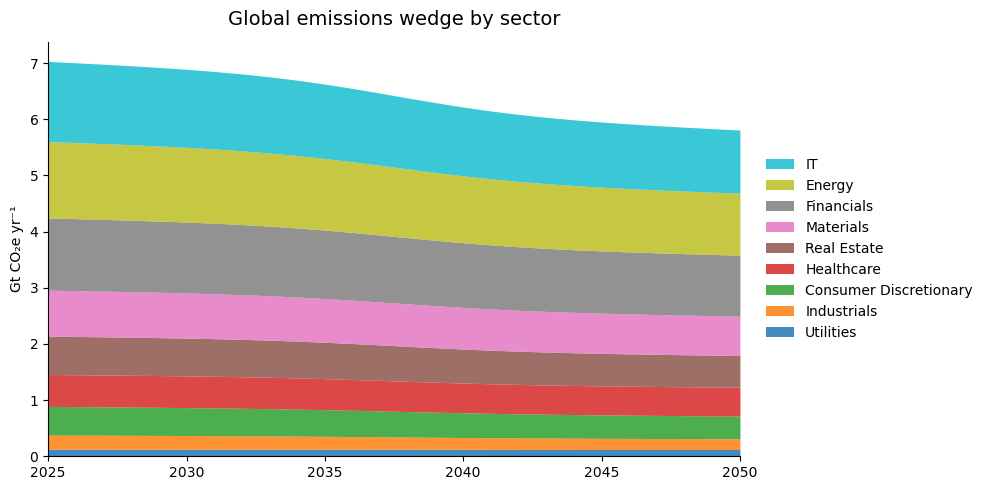

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sector_wedge(df, scope_cols=("scope1_tonnes", "scope2_tonnes"),
                      legend_rank_year=None):
    """
    Parameters
    ----------
    df : tidy DataFrame with 'year' and 'gics_sector'
    scope_cols : tuple of column names to sum for total emissions
    legend_rank_year : int or None
        Year whose sector totals should determine legend order.
        If None defaults to df.year.max().
    """
    df = df.copy()
    df["total"] = df[list(scope_cols)].fillna(0).sum(axis=1)

    # -------- stack order (small → large) so little wedges sit on top ----------
    order = (
        df[df.year == df.year.max()]
        .groupby("gics_sector")["total"]
        .sum()
        .sort_values(ascending=True)        # small → big  (for stacking)
        .index
        .tolist()
    )

    stack = (
        df.groupby(["year", "gics_sector"])["total"]
        .sum()
        .unstack(fill_value=0)[order]
        / 1e9                                #   Gt CO₂e
    )

    # --------------------------- plot -----------------------------------------
    fig, ax = plt.subplots(figsize=(10, 5))
    stack.plot.area(ax=ax, linewidth=0, alpha=0.85, colormap="tab10")

    ax.set_title("Global emissions wedge by sector", pad=12, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Gt CO₂e yr⁻¹")
    ax.set_xlim(stack.index.min(), stack.index.max())
    ax.set_ylim(0, stack.sum(axis=1).max() * 1.05)

    # ----------- legend: big → small (descending) -----------------------------
    if legend_rank_year is None:
        legend_rank_year = df.year.max()

    # totals in the chosen year
    totals = (df[df.year == legend_rank_year]
              .groupby("gics_sector")["total"]
              .sum())

    # existing handles & labels
    handles, labels = ax.get_legend_handles_labels()
    # map label → handle
    handle_map = dict(zip(labels, handles))

    # desired order: largest first
    legend_order = totals.sort_values(ascending=False).index.tolist()

    # rebuild legend
    ax.legend([handle_map[lab] for lab in legend_order],
              legend_order,
              title=None,
              loc="center left",
              bbox_to_anchor=(1.02, 0.5),
              frameon=False)

    sns.despine()
    plt.tight_layout()

# Example call
plot_sector_wedge(paths)


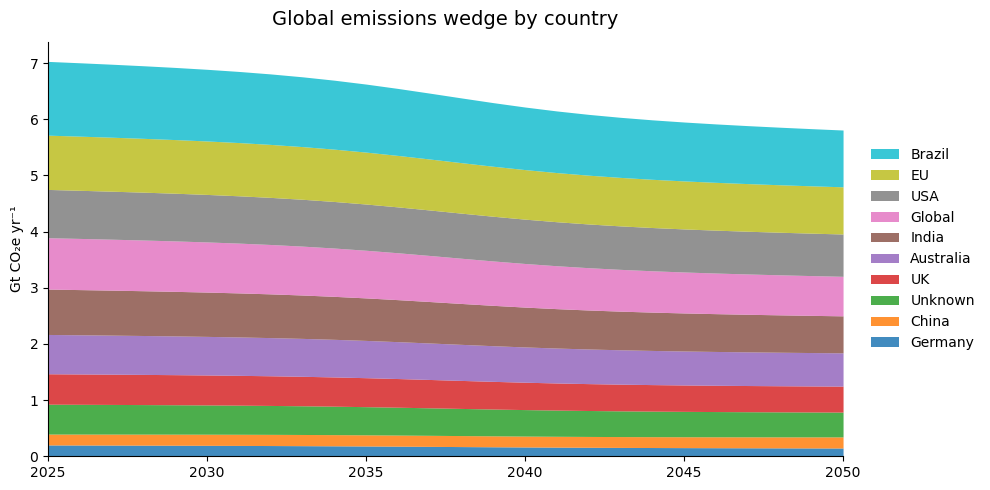

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sector_wedge(df, scope_cols=("scope1_tonnes", "scope2_tonnes"),
                      legend_rank_year=None):
    """
    Parameters
    ----------
    df : tidy DataFrame with 'year' and 'gics_sector'
    scope_cols : tuple of column names to sum for total emissions
    legend_rank_year : int or None
        Year whose sector totals should determine legend order.
        If None defaults to df.year.max().
    """
    df = df.copy()
    df["total"] = df[list(scope_cols)].fillna(0).sum(axis=1)

    # -------- stack order (small → large) so little wedges sit on top ----------
    order = (
        df[df.year == df.year.max()]
        .groupby("country")["total"]
        .sum()
        .sort_values(ascending=True)        # small → big  (for stacking)
        .index
        .tolist()
    )

    stack = (
        df.groupby(["year", "country"])["total"]
        .sum()
        .unstack(fill_value=0)[order]
        / 1e9                                #   Gt CO₂e
    )

    # --------------------------- plot -----------------------------------------
    fig, ax = plt.subplots(figsize=(10, 5))
    stack.plot.area(ax=ax, linewidth=0, alpha=0.85, colormap="tab10")

    ax.set_title("Global emissions wedge by country", pad=12, fontsize=14)
    ax.set_xlabel("")
    ax.set_ylabel("Gt CO₂e yr⁻¹")
    ax.set_xlim(stack.index.min(), stack.index.max())
    ax.set_ylim(0, stack.sum(axis=1).max() * 1.05)

    # ----------- legend: big → small (descending) -----------------------------
    if legend_rank_year is None:
        legend_rank_year = df.year.max()

    # totals in the chosen year
    totals = (df[df.year == legend_rank_year]
              .groupby("country")["total"]
              .sum())

    # existing handles & labels
    handles, labels = ax.get_legend_handles_labels()
    # map label → handle
    handle_map = dict(zip(labels, handles))

    # desired order: largest first
    legend_order = totals.sort_values(ascending=False).index.tolist()

    # rebuild legend
    ax.legend([handle_map[lab] for lab in legend_order],
              legend_order,
              title=None,
              loc="center left",
              bbox_to_anchor=(1.02, 0.5),
              frameon=False)

    sns.despine()
    plt.tight_layout()

# Example call
plot_sector_wedge(paths)


Who’s cutting fastest?

Metric % reduction 2025 → 2050 for every firm
Visual Sorted bar or dot strip with sector colour-coding

In [17]:
paths.head()

,uid,gics_sector,country,type_of_target,year,scope1_tonnes,scope2_tonnes,scenario,growth_rate,interpolation_method,total
0,C001,Real Estate,Global,Scope 2,2025,21510000,1070000,low,0.0,linear,22580000
1,C001,Real Estate,Global,Scope 2,2026,21510000,1046588,low,0.0,linear,22556588
2,C001,Real Estate,Global,Scope 2,2027,21510000,1023177,low,0.0,linear,22533177
3,C001,Real Estate,Global,Scope 2,2028,21510000,999765,low,0.0,linear,22509765
4,C001,Real Estate,Global,Scope 2,2029,21510000,976354,low,0.0,linear,22486354


In [19]:
pct

uid
C001    0.025921
C001    0.025921
C001    0.025921
C001    0.025414
C001    0.025414
          ...   
C050    0.086237
C050    0.086237
C050    0.084601
C050    0.084601
C050    0.084601
Name: pct_reduction, Length: 294, dtype: float64

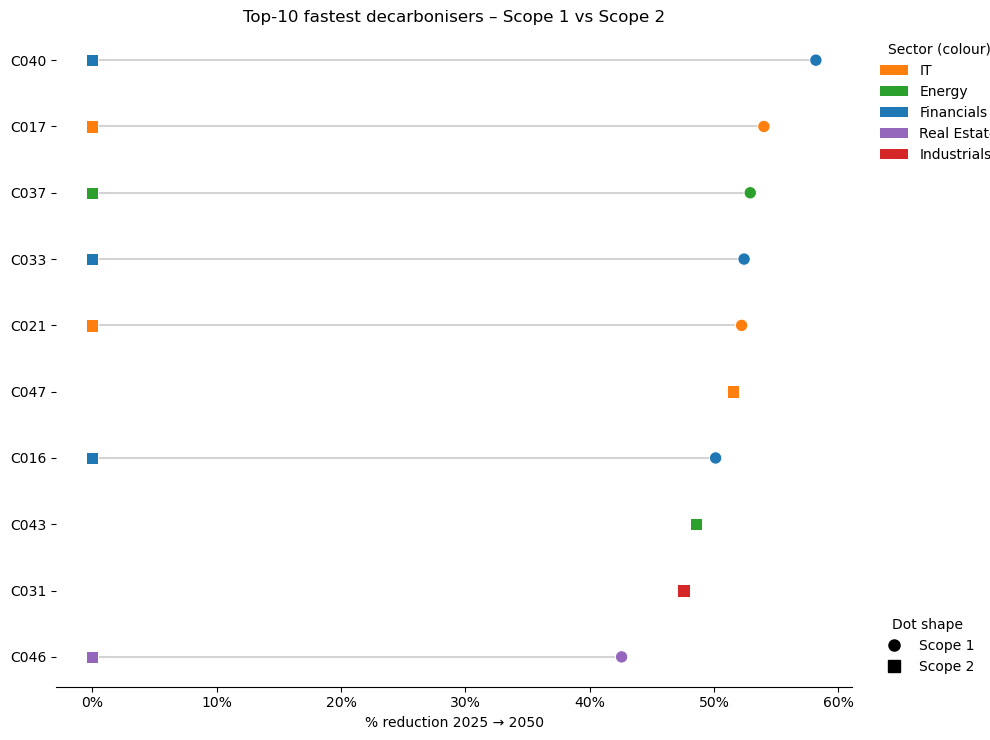

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib.ticker import PercentFormatter
from matplotlib.patches import Patch
import matplotlib.lines as mlines

# ------------ CONFIG ---------------------------------------------------------
BASE_YR, END_YR = 2025, 2050
TOP_N           = 1
palette_name    = "tab10"       # any seaborn/mpl palette

# ------------ 1. %-reduction per scope ---------------------------------------
paths   = dfs["emissions_paths"].copy()
paths   = paths[paths.year.isin([BASE_YR, END_YR])]

wide = (
    paths.pivot_table(index=["uid", "gics_sector", "year"],
                      values=["scope1_tonnes", "scope2_tonnes"],
                      aggfunc="sum")
         .reset_index()
)

def pct_reduction(scope):
    base = wide.query("year == @BASE_YR").set_index("uid")[scope]
    end  = wide.query("year == @END_YR").set_index("uid")[scope]
    good = (base > 0) & end.notna()
    return (1 - end[good] / base[good]).rename(f"pct_{scope}")

pct = pd.concat([pct_reduction("scope1_tonnes"),
                 pct_reduction("scope2_tonnes")], axis=1).dropna()

sector_map = (wide.query("year == @BASE_YR")[["uid", "gics_sector"]]
                   .drop_duplicates()
                   .set_index("uid")["gics_sector"])
tot2050 = (wide.query("year == @END_YR").groupby("uid")
                [["scope1_tonnes", "scope2_tonnes"]].sum().sum(axis=1))

pct["sector"]   = sector_map
pct["tot2050"]  = tot2050

ranked = (pct.sort_values("pct_scope1_tonnes", ascending=False)
             .head(TOP_N).reset_index())

# ------------ 2. Colour map --------------------------------------------------
sectors        = ranked["sector"].unique().tolist()
palette        = sns.color_palette(palette_name, len(sectors))
colour_map     = dict(zip(sectors, palette))

# ------------ 3. Dumbbell plot ----------------------------------------------
fig_h = 0.6*TOP_N + 1.5
fig, ax = plt.subplots(figsize=(10, fig_h))

# stems
ax.hlines(y=ranked["uid"], xmin=ranked["pct_scope1_tonnes"],
          xmax=ranked["pct_scope2_tonnes"], color="lightgray", lw=1.5, zorder=1)

# dots
sns.scatterplot(data=ranked, y="uid", x="pct_scope1_tonnes",
                hue="sector", palette=colour_map, s=80, zorder=2,
                marker="o", legend=False, ax=ax)
sns.scatterplot(data=ranked, y="uid", x="pct_scope2_tonnes",
                hue="sector", palette=colour_map, s=80, zorder=3,
                marker="s", legend=False, ax=ax)

# axes
ax.set_xlabel(f"% reduction {BASE_YR} → {END_YR}")
ax.xaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylabel("")
ax.set_title(f"Top-{TOP_N} fastest decarbonisers – Scope 1 vs Scope 2")

# ------------ 4. Manual legends ---------------------------------------------
# sector colours, ordered by total 2050 emissions (largest first)
sector_order = (ranked.groupby("sector")["tot2050"]
                        .sum().sort_values(ascending=False).index.tolist())
sector_handles = [Patch(facecolor=colour_map[s], label=s) for s in sector_order]
leg1 = ax.legend(handles=sector_handles, title="Sector (colour)",
                 bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

# dot shapes
h_s1 = mlines.Line2D([], [], color="black", marker="o", ls="", ms=8)
h_s2 = mlines.Line2D([], [], color="black", marker="s", ls="", ms=8)
ax.legend([h_s1, h_s2], ["Scope 1", "Scope 2"],
          title="Dot shape", bbox_to_anchor=(1.02, 0), loc="lower left",
          frameon=False)
ax.add_artist(leg1)

sns.despine(left=True)
plt.tight_layout()


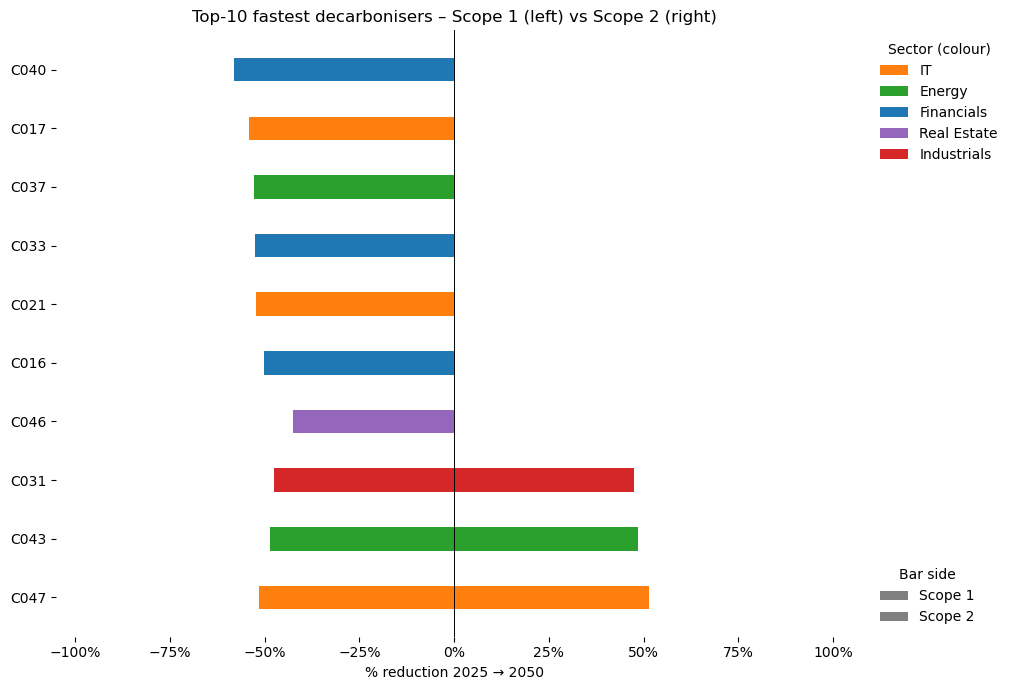

In [25]:
# --- prep (uses `ranked` from your previous cell) ---------------------------
df = ranked.copy()
df["left"]  = -df["pct_scope1_tonnes"]   # mirror Scope 1 to the left
df["right"] =  df["pct_scope2_tonnes"]

# order by whichever scope is larger so the rows are meaningful
df = df.sort_values(["right", "left"], ascending=[False, False])

# --- plot -------------------------------------------------------------------
fig_h = 0.55 * len(df) + 1.5
fig, ax = plt.subplots(figsize=(10, fig_h))

# left bars  (Scope 1)
ax.barh(df["uid"], df["left"],  color=df["sector"].map(colour_map),
        edgecolor="none", height=0.40, label="Scope 1")

# right bars (Scope 2)
ax.barh(df["uid"], df["right"], color=df["sector"].map(colour_map),
        edgecolor="none", height=0.40, label="Scope 2")

# centre line
ax.axvline(0, color="black", lw=0.7)

# axes & labels
ax.set_xlim(-1.05, 1.05)                       # -100 % .. +100 %
ax.xaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel(f"% reduction {BASE_YR} → {END_YR}")
ax.set_ylabel("")
ax.set_title(f"Top-{TOP_N} fastest decarbonisers – Scope 1 (left) vs Scope 2 (right)")

# *** legends ***
sector_patches = [Patch(fc=colour_map[s], label=s) for s in sector_order]
leg1 = ax.legend(handles=sector_patches, title="Sector (colour)",
                 bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)

# scope legend
ax.legend([Patch(fc="gray"), Patch(fc="gray")],
          ["Scope 1", "Scope 2"], title="Bar side",
          bbox_to_anchor=(1.02, 0), loc="lower left", frameon=False)
ax.add_artist(leg1)

sns.despine(left=True, bottom=True)
plt.tight_layout()


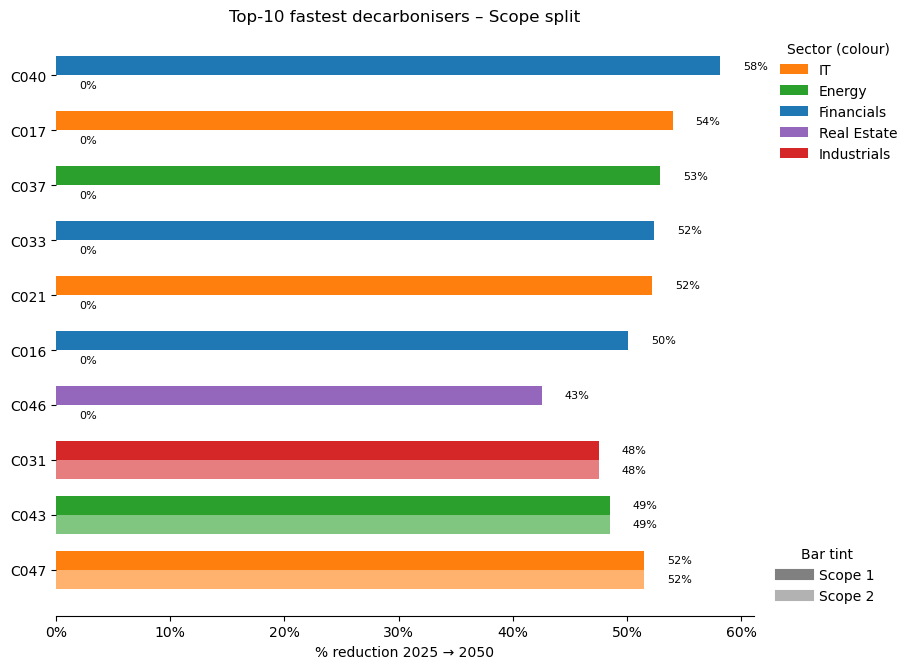

In [26]:
fig_h = 0.55 * len(df) + 1.3
fig, ax = plt.subplots(figsize=(9, fig_h))

bar_h = 0.35
y_pos  = np.arange(len(df))

# bars
ax.barh(y_pos + bar_h/2, df["pct_scope1_tonnes"],
        height=bar_h, label="Scope 1",
        color=df["sector"].map(colour_map))
ax.barh(y_pos - bar_h/2, df["pct_scope2_tonnes"],
        height=bar_h, label="Scope 2",
        color=df["sector"].map(colour_map), alpha=0.6)

# value labels
for i, (s1, s2) in enumerate(zip(df["pct_scope1_tonnes"], df["pct_scope2_tonnes"])):
    ax.text(s1 + 0.02, i + bar_h/2, f"{s1:.0%}", va="center", fontsize=8)
    ax.text(s2 + 0.02, i - bar_h/2, f"{s2:.0%}", va="center", fontsize=8)

# cosmetics
ax.set_yticks(y_pos)
ax.set_yticklabels(df["uid"])
ax.xaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel(f"% reduction {BASE_YR} → {END_YR}")
ax.set_title(f"Top-{TOP_N} fastest decarbonisers – Scope split")

# legends
sector_patches = [Patch(fc=colour_map[s], label=s) for s in sector_order]
leg1 = ax.legend(handles=sector_patches, title="Sector (colour)",
                 bbox_to_anchor=(1.02, 1), loc="upper left", frameon=False)
leg2 = ax.legend(handles=[mlines.Line2D([],[],lw=8,color="gray", label="Scope 1"),
                          mlines.Line2D([],[],lw=8,color="gray", alpha=0.6, label="Scope 2")],
                 title="Bar tint", bbox_to_anchor=(1.02, 0), loc="lower left",
                 frameon=False)
ax.add_artist(leg1)

sns.despine(left=True)
plt.tight_layout()


In [28]:
cc

,uid,year,scenario,carbon_cost_usd
0,C002,2025,Low Risk,7.288256e+08
1,C002,2025,Medium Risk,7.818776e+08
2,C002,2025,High Risk,7.851601e+08
3,C002,2026,Low Risk,7.525294e+08
4,C002,2026,Medium Risk,8.330080e+08
...,...,...,...,...
1555,C050,2049,Medium Risk,2.386497e+09
1556,C050,2049,High Risk,3.935105e+09
1557,C050,2050,Low Risk,9.661846e+08
1558,C050,2050,Medium Risk,2.446674e+09


3. Translation into money: carbon-price liability

Metric Annual and cumulative carbon-pricing cost per firm & scenario

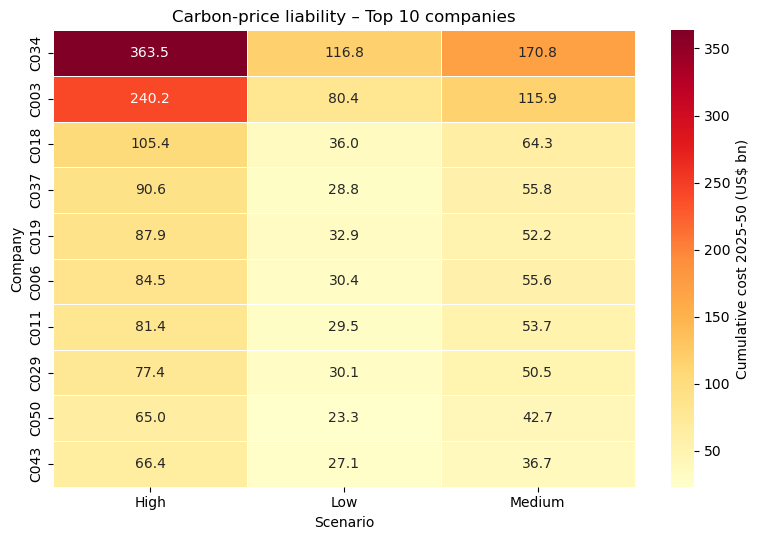

In [32]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm          #  ← NEW

# ------------ CONFIG -------------------------------------------------
UID_COL  = "uid"
SCEN_COL = "scenario"
YEAR_COL = "year"
COST_COL = "carbon_cost_usd"    # your column
TOP_N    = 10

cc = dfs["carbon_costs"].copy()

# optional tidy-up of scenario names
cc[SCEN_COL] = (cc[SCEN_COL]
                .str.strip()
                .str.replace(r"\s+Risk", "", regex=True)
                .str.title())

# ------------ 1. cumulative  cost (in USD bn) ------------------------
cum_tbl = (
    cc.groupby([UID_COL, SCEN_COL])[COST_COL]
      .sum()
      .unstack(fill_value=0) / 1e9
)

# keep non-zero rows and top-N
ranked = (cum_tbl.loc[cum_tbl.sum(axis=1) > 0]
                   .assign(total=lambda d: d.sum(axis=1))
                   .sort_values("total", ascending=False)
                   .drop(columns="total")
                   .head(TOP_N))

# ------------ 2. heat-map -------------------------------------------
vmin, vmax = ranked.min().min(), ranked.max().max()
use_log    = vmax / max(vmin, 1e-6) > 100        # >2 orders of magnitude?

fig_h = 0.4*len(ranked) + 1.5
fig, ax = plt.subplots(figsize=(8, fig_h))

sns.heatmap(
    ranked,
    cmap="YlOrRd",
    norm=LogNorm(vmin=max(vmin, 1e-3), vmax=vmax) if use_log else None,
    annot=True, fmt=".1f",
    linewidths=0.5,
    cbar_kws=dict(label="Cumulative cost 2025-50 (US$ bn)"),
    ax=ax,
)

ax.set_title(f"Carbon-price liability – Top {TOP_N} companies")
ax.set_xlabel("Scenario")
ax.set_ylabel("Company")
plt.tight_layout()


In [ ]:
4. What would it cost to avoid those payments?

Metric Cheapest abatement CAPEX to meet targets
Visual Waterfall per company (top-risk names)

. Total Carbon Pricing Costs by 2050

Purpose: Illustrate the financial burden of carbon pricing up to 2050.

In [41]:
dfs['carbon_costs'].head()

,uid,year,scenario,carbon_cost_usd
0,C002,2025,Low Risk,7.288256e+08
1,C002,2025,Medium Risk,7.818776e+08
2,C002,2025,High Risk,7.851601e+08
3,C002,2026,Low Risk,7.525294e+08
4,C002,2026,Medium Risk,8.330080e+08


In [ ]:
# def select_top_companies_per_sector(df_emissions, df_merged, baseline_year=2025, top_n=3):
#     """Select the top N companies per sector based on emissions in a baseline year."""
#     # Filter emissions for the baseline year
#     df_baseline = df_emissions[df_emissions['year'] == baseline_year]
#     # Merge with sector information
#     df_baseline = df_baseline.merge(df_merged[['uid', 'sector']], on='uid')
#     # Group by sector and select top N companies by emissions
#     top_companies = df_baseline.groupby('sector').apply(
#         lambda x: x.nlargest(top_n, 'emissions')
#     ).reset_index(drop=True)
#     # Return unique company names
#     return top_companies['company'].unique()

/var/folders/lf/9_7wh6ps1354b6glt9mst87m0000gn/T/ipykernel_44278/1408930695.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(top_n, 'total_emissions')['uid'])


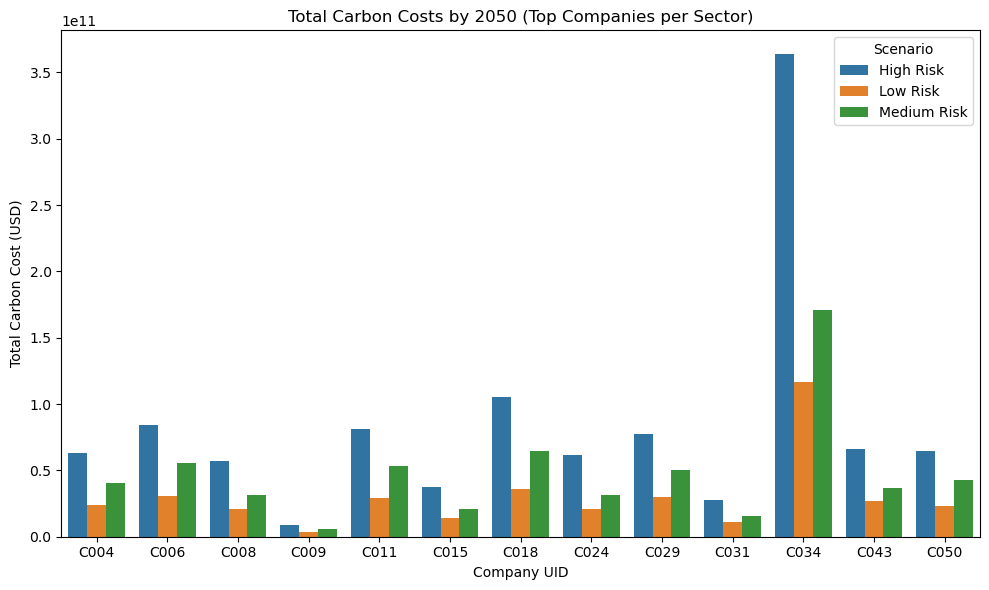

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def select_top_companies_per_sector(df_emissions, baseline_year=2025, baseline_scenario='low', top_n=3):
    """
    Select top N companies per sector based on total emissions in the baseline year and scenario.
    
    Parameters:
    - df_emissions: DataFrame with emissions data (e.g., dfs['emissions_paths'])
    - baseline_year: Year to use as baseline (default: 2025)
    - baseline_scenario: Scenario to filter (default: 'low')
    - top_n: Number of top companies per sector (default: 3)
    
    Returns:
    - List of unique 'uid' values for selected companies
    """
    # Filter for baseline year and scenario
    df_baseline = df_emissions[(df_emissions['year'] == baseline_year) & 
                               (df_emissions['scenario'] == baseline_scenario)].copy()
    
    # Calculate total emissions as sum of Scope 1 and Scope 2
    df_baseline['total_emissions'] = df_baseline['scope1_tonnes'] + df_baseline['scope2_tonnes']
    
    # Group by sector and select top N companies by total emissions
    top_uids = (df_baseline.groupby('gics_sector')
                .apply(lambda x: x.nlargest(top_n, 'total_emissions')['uid'])
                .reset_index(drop=True))
    
    return top_uids.unique().tolist()

def plot_total_carbon_costs(dfs):
    """Plot total carbon costs by 2050 for selected companies."""
    # Access carbon costs dataframe from dfs dictionary
    df_carbon_costs = dfs['carbon_costs']
    
    # Filter for years up to 2050, group by uid and scenario, sum carbon costs
    df_total = (df_carbon_costs[df_carbon_costs['year'] <= 2050]
                .groupby(['uid', 'scenario'])['carbon_cost_usd']
                .sum()
                .reset_index())
    
    # Select top companies using emissions_paths
    selected_companies = select_top_companies_per_sector(dfs['emissions_paths'])
    
    # Filter for selected companies
    df_selected = df_total[df_total['uid'].isin(selected_companies)]
    
    # Create bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df_selected, x='uid', y='carbon_cost_usd', hue='scenario')
    plt.title('Total Carbon Costs by 2050 (Top Companies per Sector)')
    plt.xlabel('Company UID')
    plt.ylabel('Total Carbon Cost (USD)')
    plt.legend(title='Scenario')
    plt.tight_layout()
    plt.show()

# Example call (assuming dfs is a dictionary of dataframes)
plot_total_carbon_costs(dfs)

In [54]:
# plot_total_carbon_costs(dfs)

5. Pay-or-abate decision frame

Metric NPV(carbon-price) – NPV(abatement)
Visual Quadrant scatter: x = abatement spend, y = carbon-price liability

In [ ]:


trade = pd.DataFrame({
    "abatement_npv": abatement_npv,      # pre-calculated series
    "price_npv":     npv_tbl["high"],    # pick high-risk scenario for stress
    "sector": paths.set_index("company").sector,
})
trade.plot.scatter("abatement_npv", "price_npv", c=trade.sector.map(sector_col),
                   figsize=(7,7), alpha=0.7, s=80)
plt.axline((0,0),(1,1), ls="--"); plt.xlabel("NPV: abatement (US$ bn)")
plt.ylabel("NPV: carbon price paid (US$ bn)")
plt.title("Invest vs. Pay – High-risk scenario")

Interpretation cue: Upper-right = expensive either way (watch-list).
Below the 45° line = abatement cheaper than paying.

6. Regional context

Metric Average carbon-price cost per tonne by region & scenario
Visual Choropleth map or strip plot

In [36]:
carbon_costs.head()

,uid,year,scenario,carbon_cost_usd
0,C002,2025,Low Risk,7.288256e+08
1,C002,2025,Medium Risk,7.818776e+08
2,C002,2025,High Risk,7.851601e+08
3,C002,2026,Low Risk,7.525294e+08
4,C002,2026,Medium Risk,8.330080e+08


In [ ]:
import pandas as pd
import plotly.graph_objs as go

# --- Load and Clean Data ---
summary_data = pd.read_csv('abatement_summary.csv')
annual_data = pd.read_csv('annual_abatement_costs.csv')
detail_data = pd.read_csv('abatement_detail.csv')

# Clean summary_data
for col in ['total_capex_usd', 'total_opex_usd', 'total_abated_tonnes']:
    summary_data[col] = pd.to_numeric(summary_data[col], errors='coerce').fillna(0)

# Clean annual_data
for col in ['abatement_tonnes', 'capex_usd', 'opex_usd_year', 'cum_capex_usd', 'cum_opex_usd']:
    annual_data[col] = pd.to_numeric(annual_data[col], errors='coerce').fillna(0)
annual_data['year'] = pd.to_numeric(annual_data['year'], errors='coerce').astype('Int64')

# Clean detail_data
detail_data['new_build'] = detail_data['new_build'].map({'True': True, 'False': False, True: True, False: False})
for col in ['tonnes', 'capex_usd', 'opex_usd_year', 'spare_after_yr']:
    detail_data[col] = pd.to_numeric(detail_data[col], errors='coerce').fillna(0)
detail_data['year'] = pd.to_numeric(detail_data['year'], errors='coerce').astype('Int64')

# --- 1. Total Abatement Costs Over Time (Line Chart) ---
annual_costs = annual_data.groupby('year').agg({'capex_usd': 'sum', 'opex_usd_year': 'sum'}).reset_index()
fig1 = go.Figure()
fig1.add_trace(go.Scatter(x=annual_costs['year'], y=annual_costs['capex_usd'], name='Capital Expenditure', line=dict(color='#8884d8')))
fig1.add_trace(go.Scatter(x=annual_costs['year'], y=annual_costs['opex_usd_year'], name='Operational Expenditure', line=dict(color='#82ca9d')))
fig1.update_layout(
    title="Total Abatement Costs Over Time",
    xaxis_title="Year",
    yaxis_title="Cost (USD)",
    yaxis_tickformat=',.0s',  # SI notation for large numbers (e.g., M for millions)
    template='plotly_white'
)
fig1.show()

# --- 2. Annual Abatement Tonnes by Company (Stacked Bar Chart) ---
tonnes_pivot = annual_data.pivot_table(index='uid', columns='year', values='abatement_tonnes', aggfunc='sum', fill_value=0)
fig2 = go.Figure()
for year in tonnes_pivot.columns:
    fig2.add_trace(go.Bar(x=tonnes_pivot.index, y=tonnes_pivot[year], name=str(year)))
fig2.update_layout(
    barmode='stack',
    title="Annual Abatement Tonnes by Company",
    xaxis_title="Company",
    yaxis_title="Abatement Tonnes",
    yaxis_tickformat=',.0s',
    template='plotly_white',
    xaxis_tickangle=-45  # Rotate labels for readability
)
fig2.show()

# --- 3. Technology Adoption Over Time (Line Chart) ---
adoption_data = detail_data[detail_data['new_build']].groupby(['year', 'technology']).size().unstack(fill_value=0)
fig3 = go.Figure()
for tech in adoption_data.columns:
    fig3.add_trace(go.Scatter(x=adoption_data.index, y=adoption_data[tech], name=tech, mode='lines'))
fig3.update_layout(
    title="Technology Adoption Over Time",
    xaxis_title="Year",
    yaxis_title="Number of New Builds",
    template='plotly_white'
)
fig3.show()

# --- 4. Cost-Effectiveness of Technologies (Scatter Chart) ---
tech_cost_effect = detail_data.groupby('technology').agg({
    'capex_usd': 'sum',
    'opex_usd_year': 'sum',
    'tonnes': 'sum'
}).reset_index()
tech_cost_effect['total_cost'] = tech_cost_effect['capex_usd'] + tech_cost_effect['opex_usd_year']
tech_cost_effect['cost_per_tonne'] = tech_cost_effect['total_cost'] / tech_cost_effect['tonnes']
fig4 = go.Figure()
fig4.add_trace(go.Scatter(
    x=tech_cost_effect['cost_per_tonne'],
    y=tech_cost_effect['tonnes'],
    mode='markers+text',
    text=tech_cost_effect['technology'],
    textposition='top center',
    marker=dict(size=tech_cost_effect['tonnes'] / 1e6, sizemode='area', sizeref=2.*max(tech_cost_effect['tonnes']/1e6)/(40.**2))
))
fig4.update_layout(
    title="Cost-Effectiveness of Technologies",
    xaxis_title="Cost per Tonne (USD)",
    yaxis_title="Total Tonnes",
    template='plotly_white'
)
fig4.show()

# --- 5. Company-Specific Abatement Costs (Bar Chart) ---
company_costs = summary_data.copy()
company_costs['total_cost'] = company_costs['total_capex_usd'] + company_costs['total_opex_usd']
fig5 = go.Figure()
fig5.add_trace(go.Bar(x=company_costs['uid'], y=company_costs['total_cost'], name='Total Cost'))
fig5.update_layout(
    title="Company-Specific Abatement Costs",
    xaxis_title="Company",
    yaxis_title="Total Cost (USD)",
    yaxis_tickformat=',.0s',
    template='plotly_white',
    xaxis_tickangle=-45
)
fig5.show()

# --- 6. Cumulative Abatement Tonnes (Area Chart) ---
cumulative_tonnes = annual_data.groupby('year')['abatement_tonnes'].sum().cumsum().reset_index()
fig6 = go.Figure()
fig6.add_trace(go.Scatter(x=cumulative_tonnes['year'], y=cumulative_tonnes['abatement_tonnes'], fill='tozeroy', name='Cumulative Tonnes'))
fig6.update_layout(
    title="Cumulative Abatement Tonnes",
    xaxis_title="Year",
    yaxis_title="Cumulative Tonnes",
    yaxis_tickformat=',.0s',
    template='plotly_white'  
)
fig6.show()

# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Helper function to select top companies per sector
# def select_top_companies_per_sector(df_emissions, baseline_year=2025, baseline_scenario='low', top_n=3):
#     """
#     Select top N companies per sector based on total emissions in the baseline year and scenario.
    
#     Parameters:
#     - df_emissions: DataFrame with emissions data
#     - baseline_year: Year to use as baseline (default: 2025)
#     - baseline_scenario: Scenario to filter (default: 'low')
#     - top_n: Number of top companies per sector (default: 3)
    
#     Returns:
#     - List of unique 'uid' values for selected companies
#     """
#     df_baseline = df_emissions[(df_emissions['year'] == baseline_year) & 
#                                (df_emissions['scenario'] == baseline_scenario)].copy()
#     df_baseline['total_emissions'] = df_baseline['scope1_tonnes'] + df_baseline['scope2_tonnes']
#     top_uids = (df_baseline.groupby('gics_sector')
#                 .apply(lambda x: x.nlargest(top_n, 'total_emissions')['uid'])
#                 .reset_index(drop=True))
#     return top_uids.unique().tolist()

# # 1. Emissions Projections Over Time
# def plot_emissions_projections(df_emissions):
#     """Plot emissions projections for top companies per sector."""
#     selected_companies = select_top_companies_per_sector(df_emissions)
#     df_selected = df_emissions[df_emissions['uid'].isin(selected_companies)].copy()
#     df_selected['total_emissions'] = df_selected['scope1_tonnes'] + df_selected['scope2_tonnes']
    
#     plt.figure(figsize=(12, 6))
#     sns.lineplot(data=df_selected, x='year', y='total_emissions', hue='scenario', style='uid')
#     plt.title('Projected Emissions Over Time (Top 3 Companies per Sector)')
#     plt.xlabel('Year')
#     plt.ylabel('Total Emissions (MtCO2e)')
#     plt.legend(title='Scenario / Company UID', bbox_to_anchor=(1.05, 1), loc='upper left')
#     plt.tight_layout()
#     plt.show()

# # 2. Total Carbon Pricing Costs by 2050
# def plot_carbon_costs(df_carbon_costs):
#     """Plot total carbon costs by 2050 for selected companies."""
#     selected_companies = select_top_companies_per_sector(pd.DataFrame())  # Placeholder; adjust if emissions data is needed
#     df_total = (df_carbon_costs[df_carbon_costs['year'] <= 2050]
#                 .groupby(['uid', 'scenario'])['carbon_cost_usd']
#                 .sum()
#                 .reset_index())
#     df_selected = df_total[df_total['uid'].isin(selected_companies)]
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=df_selected, x='uid', y='carbon_cost_usd', hue='scenario')
#     plt.title('Total Carbon Costs by 2050 (Top Companies)')
#     plt.xlabel('Company UID')
#     plt.ylabel('Total Carbon Cost (USD)')
#     plt.legend(title='Scenario')
#     plt.tight_layout()
#     plt.show()

# # 3. Abatement Costs vs. Carbon Cost Savings
# def plot_abatement_vs_savings(df_abatement):
#     """Scatter plot of abatement costs vs. carbon cost savings."""
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df_abatement, x='total_abatement_cost_usd', y='total_carbon_cost_savings_usd', hue='gics_sector')
#     max_val = max(df_abatement['total_abatement_cost_usd'].max(), df_abatement['total_carbon_cost_savings_usd'].max())
#     plt.plot([0, max_val], [0, max_val], 'k--', label='Break-Even Line')
#     plt.title('Abatement Costs vs. Carbon Cost Savings')
#     plt.xlabel('Total Abatement Cost (USD)')
#     plt.ylabel('Total Carbon Cost Savings (USD)')
#     plt.legend(title='Sector')
#     plt.tight_layout()
#     plt.show()

# # 4. Break-Even Carbon Price
# def plot_break_even_price(df_abatement):
#     """Plot break-even carbon price for abatement options."""
#     df_abatement['break_even_price'] = df_abatement['total_abatement_cost_usd'] / df_abatement['total_emissions_reduction_tonnes']
    
#     plt.figure(figsize=(12, 6))
#     sns.scatterplot(data=df_abatement, x='uid', y='break_even_price')
#     plt.xticks(rotation=90)
#     plt.title('Break-Even Carbon Price by Company')
#     plt.xlabel('Company UID')
#     plt.ylabel('Break-Even Price ($/tCO2)')
#     plt.tight_layout()
#     plt.show()

# # 5. Cost-Effectiveness of Abatement
# def plot_cost_effectiveness(df_abatement):
#     """Scatter plot of abatement cost-effectiveness."""
#     df_abatement['cost_per_ton'] = df_abatement['total_abatement_cost_usd'] / df_abatement['total_emissions_reduction_tonnes']
    
#     plt.figure(figsize=(10, 6))
#     sns.scatterplot(data=df_abatement, x='cost_per_ton', y='total_emissions_reduction_tonnes', hue='gics_sector')
#     plt.title('Cost-Effectiveness of Abatement')
#     plt.xlabel('Cost per Ton ($/tCO2)')
#     plt.ylabel('Total Emissions Reduction (MtCO2e)')
#     plt.legend(title='Sector')
#     plt.tight_layout()
#     plt.show()

# # 6. Net Cost of Abatement
# def plot_net_cost(df_abatement):
#     """Bar chart of net abatement costs."""
#     df_abatement['net_cost'] = df_abatement['total_abatement_cost_usd'] - df_abatement['total_carbon_cost_savings_usd']
#     selected_companies = select_top_companies_per_sector(pd.DataFrame())  # Placeholder; adjust if emissions data is needed
#     df_selected = df_abatement[df_abatement['uid'].isin(selected_companies)]
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=df_selected, x='uid', y='net_cost')
#     plt.title('Net Cost of Abatement by Company')
#     plt.xlabel('Company UID')
#     plt.ylabel('Net Cost (USD)')
#     plt.tight_layout()
#     plt.show()

# # 7. Payback Period for Abatement Investments
# def plot_payback_period(df_abatement):
#     """Bar chart of payback periods for abatement investments."""
#     df_abatement['payback_period'] = df_abatement['total_abatement_cost_usd'] / (df_abatement['total_carbon_cost_savings_usd'] / 25)  # Assuming 25 years
    
#     plt.figure(figsize=(12, 6))
#     sns.barplot(data=df_abatement, x='uid', y='payback_period')
#     plt.xticks(rotation=90)
#     plt.title('Payback Period for Abatement Investments')
#     plt.xlabel('Company UID')
#     plt.ylabel('Payback Period (Years)')
#     plt.tight_layout()
#     plt.show()

# # 8. Sector-Level Insights
# def plot_sector_insights(df_abatement):
#     """Bar chart of average net abatement cost by sector."""
#     df_abatement['net_cost'] = df_abatement['total_abatement_cost_usd'] - df_abatement['total_carbon_cost_savings_usd']
#     df_sector = df_abatement.groupby('gics_sector')['net_cost'].mean().reset_index()
    
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=df_sector, x='gics_sector', y='net_cost')
#     plt.title('Average Net Cost of Abatement by Sector')
#     plt.xlabel('Sector')
#     plt.ylabel('Average Net Cost (USD)')
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()

# # 9. Distribution of Net Costs
# def plot_cost_distribution(df_abatement):
#     """Histogram of net abatement costs."""
#     df_abatement['net_cost'] = df_abatement['total_abatement_cost_usd'] - df_abatement['total_carbon_cost_savings_usd']
    
#     plt.figure(figsize=(10, 6))
#     sns.histplot(data=df_abatement, x='net_cost', bins=20)
#     plt.title('Distribution of Net Costs Across Companies')
#     plt.xlabel('Net Cost (USD)')
#     plt.ylabel('Count')
#     plt.tight_layout()
#     plt.show()

# # 10. Cumulative Carbon Costs Over Time
# def plot_cumulative_costs(df_carbon_costs):
#     """Line chart of cumulative carbon costs for a selected company."""
#     selected_company = df_carbon_costs['uid'].iloc[0]  # Select first company as example
#     df_company = df_carbon_costs[df_carbon_costs['uid'] == selected_company].copy()
#     df_company['cumulative_cost'] = df_company['carbon_cost_usd'].cumsum()
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(df_company['year'], df_company['cumulative_cost'], label='Cumulative Cost')
#     plt.title(f'Cumulative Carbon Costs for Company {selected_company}')
#     plt.xlabel('Year')
#     plt.ylabel('Cumulative Cost (USD)')
#     plt.legend()
#     plt.tight_layout()
#     plt.show()